# Another data cleaning techinique

Data scaling and normalization (and what the difference is between the two).




The first thing we'll need to do is load in the libraries and datasets we'll be using.

**Note** If you have error about missing libraries - just remember to stop jupyter, and install it by our previous lesson `pip install your-missing-library`


In [3]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
houses = pd.read_csv("../DATA/houses.csv")

# set seed for reproducibility
np.random.seed(0)

# Scaling vs. Normalization: What's the difference?
____

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and they are very similar!  
In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the *range* of your data while in normalization you're changing the *shape of the distribution* of your data. 


___

## **Scaling**

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1.  You want to scale data when you're using methods based on measures of how far apart data points, like [support vector machines, or SVM](https://en.wikipedia.org/wiki/Support_vector_machine) or [k-nearest neighbors, or KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). With these algorithms, a change of "1" in any numeric feature is given the same importance. 

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar!  With currency, you can convert between currencies. But what about if you're looking at something like height and weight?



In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

The *shape* of the data doesn't change, but instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

___
## Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

> **[Normal distribution:](https://en.wikipedia.org/wiki/Normal_distribution)** - the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution = the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed, like:t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA), Gaussian naive Bayes...

The method were  using to normalize here is called the [Box-Cox Transformation](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation). 

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Notice that the *shape* of our data has changed. Before normalizing it was L-shaped, after normalizing it looks  like "bell curve". 


# Scaling
___

Let's start by scaling the goals of each campaign, which is how much money they were asking for.

In [ ]:
# select the LotArea column
lotArea = houses.LotArea.dropna()

# scale the goals from 0 to 1
scaled_data = minmax_scaling(lotArea, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(houses.LotArea.dropna(), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most hauses have typical aresa but a few have very large ones)

**Challenge**

In [ ]:
# Challenge
# We just scaled the "LotArea" column. What about the "LotFrontage" column?


# Normalization
___


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalized data')

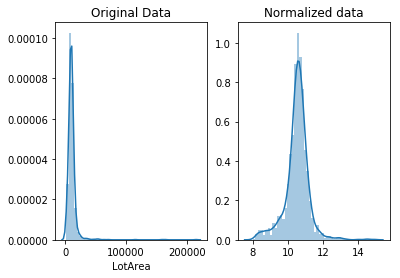

In [4]:
# get only positive pledges (using their indexes)
positive_pledges = houses.LotArea 

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

It's not perfect but it is much closer to normal


**Challenge**

In [ ]:
# Challenge 
# We looked as the LotArea column. What about the "LotFrontage" column? Does it have the same info?


In [5]:
x = houses.LotArea
y = houses.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( normalized_pledges, y, test_size=0.20, random_state=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


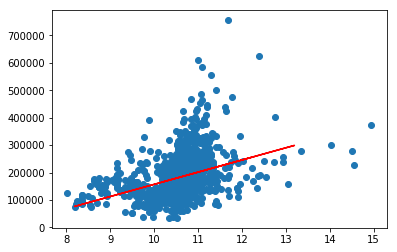

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X_train[:, np.newaxis], Y_train)

Y_pred = model.predict(X_test[:, np.newaxis])

plt.scatter(X_train, Y_train)
plt.plot(X_test, Y_pred, color='#FF0000');